# 解答例：Week3 授業前課題1 アヤメの分析

## フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

- [Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)

setosa、virgiclor、virginicaはここで **目的変数** や **ラベル** と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を **特徴量** と呼びます。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

## データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

### 【問題1】データの取得

以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数`X`に格納してください。列の名前も以下を参考にしてください。

[pandas.DataFrame — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

`X =`

|　| sepal_length | sepal_width | petal_length | petal_width |
:---:|:---:|:---:|:---:|:---:
|**0**| 5.1 | 3.5 | 1.4 | 0.2 |
|**1**| 4.9 | 3.0 | 1.3 | 0.2 |
|**2**| 4.7 | 3.2 | 1.3 | 0.2 |
|**3**| 4.6 | 3.1 | 1.5 | 0.2 |
|：|：|：|：|:|

目的変数も同様に`y`に格納してください。

`y =`

|　| Species |
:---:|:---:
|**0**| 0 |
|**1**| 0 |
|**2**| 0 |
|**3**| 0 |
|：|：|

In [2]:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])

In [3]:
# DataFrameの表示はセルに変数を直接書く他、display()が使えます
display(X)
display(y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [4]:
print("種類の名前 : {}".format(iris_dataset.target_names))

種類の名前 : ['setosa' 'versicolor' 'virginica']


### 【問題2】データの結合

問題1で準備した`X,y`を結合させたDataFrame型変数`df`を作成してください。結合することで扱いやすくなります。これ以降はこの`df`を使っていきます。

`df =`

|　| sepal_length | sepal_width | petal_length | petal_width | Species |
:---:|:---:|:---:|:---:|:---:|:---:
**0**| 5.1 | 3.5 | 1.4 | 0.2 | 0
**1**| 4.9 | 3.0 | 1.3 | 0.2 | 0
**2**| 4.7 | 3.2 | 1.3 | 0.2 | 0
**3**| 4.6 | 3.1 | 1.5 | 0.2 | 0
|:|：|：|：|：|:|


[Merge, join, and concatenate — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

[pandas.concat — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)


In [5]:
df = pd.concat([X, y], axis=1)

## データの概観

### 【問題3】データの確認

今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

`.head()`,`.info()`,`.describe()`,`.count()`,`.isnull()`,`.sum()`などのPandasのメソッドを使ってみましょう。

[pandas.DataFrame.head — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

[pandas.DataFrame.info — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

[pandas.DataFrame.describe — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

[pandas.DataFrame.count — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)

[pandas.DataFrame.isnull — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)

[pandas.DataFrame.sum — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

「先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）」

サンプル5つを見た限りでは特徴量は小数点以下1桁の浮動少数点数である。

scikit-learnのドキュメントの説明も見るとそれぞれ単位はcmである。

（解説）

まずはDataFrameの`head`メソッドでこのように見てみるようにしましょう。

In [6]:
df.head(5) 

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


（発展）

どのラベルでも特徴量は小数点以下1桁の浮動少数点数である。ラベルごとに値の大きさに傾向がありそうである。

0から49、50から99、100から149と同じラベルのサンプルが並んでいそうなことも分かる。

（解説）

ラベルごとに見てみるのも良いでしょう。以下の例ではfor文と組み合わせ、DataFrameをラベルを条件に抜き出して表示しています。上からだけの`head`メソッドだけではなく、下から表示する`tail`メソッドも使ってみています。

In [7]:
labels = df["Species"].unique() # ラベルの一覧を取得
for label in labels:
    print("label : {}".format(label))
    display(df.query("Species =={}".format(label)).head())
    display(df.query("Species =={}".format(label)).tail())
    # df[df["Species"]==label] でもOK
    print("----------")


label : 0


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal_length,sepal_width,petal_length,petal_width,Species
45,4.8,3.0,1.4,0.3,0
46,5.1,3.8,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0


----------
label : 1


,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


,sepal_length,sepal_width,petal_length,petal_width,Species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


----------
label : 2


,sepal_length,sepal_width,petal_length,petal_width,Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


,sepal_length,sepal_width,petal_length,petal_width,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


----------


「ラベルごとのサンプル数の合計を出力する。」

全てのラベルがサンプル数50である。

（解説）

ラベルは列Speciesの0, 1, 2を指しています。列SpeciesのSeriesを抜き出し、`value_counts`メソッドが便利です。

In [8]:
# SpeciesのSeriesを抜き出し、value_counts()メソッドを使う
display(df["Species"].value_counts())

# 以下の書き方でもSeriesを同じように抜き出せる
display(df.Species.value_counts())

2    50
1    50
0    50
Name: Species, dtype: int64

2    50
1    50
0    50
Name: Species, dtype: int64

「特徴量に欠損値があるかを確認する。」

どの列にも欠損値はない。

（解説）

値が欠けていることを欠損値と呼びます。このデータセットにはそういう箇所はありません。このデータは **完全データ** です。（欠損がある場合は不完全データ）

`isnull`メソッドは各要素に対して欠損値かどうかをbool型（True or False）で判定します。これを列方向で合計することで、その列の欠損値の数が整数で求まります。bool型は四則演算によって整数になります。

In [9]:
df.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

（別解）

`info`メソッドを使うことでも各列に欠損値があるかどうかを判定できます。

`150 non-null float64`なので、64ビットの浮動小数点数が欠損値なしで150サンプルです。

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


**欠損値はどのように発生するか？**

欠損値は大きく分けて3種類のパターンがあります。それぞれ欠損値への対応に違いがでてきます。

ここでは簡単に紹介だけします。

**Missing Completely At Random(MCAR)**

完全にランダムに欠損。

欠損に理由や意味はない場合。（例）記入漏れ。

**Missing At Random(MAR)**

観測データによる欠損。

他の特徴量の値を理由に欠損している場合。（例）若年層は答えていない項目。

**Missing Not At Random(MNAR)**

欠損データによる欠損。

欠損値の本来の値を理由に欠損している場合。（例）温度が上がりすぎてセンサーが測れない。

「特徴量の平均値と標準偏差、四分位数を一度に表示させる。」

それぞれの特徴量がだいたいどのくらいの値をとるかが確認できた。植物のある部分の長さを測っていることを考えても、極端に大きな値や小さな値（外れ値）はなさそうであることが分かった。

（解説）

`describe`メソッドにより各種統計量を表示させることができます。

ある程度の値の範囲を確認することが大切です。**外れ値**があるかどうかの判断材料にもなります。

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


（発展）

`head`メソッドの時と同様にこちらもラベルごとに見ることもできます。それぞれの傾向が見えてきます。

In [12]:
labels = df["Species"].unique() # ラベルの一覧を取得
for label in labels:
    print("label : {}".format(label))
    display(df.query("Species =={}".format(label)).describe())
    print("----------")

label : 0


,sepal_length,sepal_width,petal_length,petal_width,Species
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


----------
label : 1


,sepal_length,sepal_width,petal_length,petal_width,Species
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


----------
label : 2


,sepal_length,sepal_width,petal_length,petal_width,Species
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


----------


### 【問題4】irisデータセット自体の調査

ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

（解答例）

統計学者ロナルドフィッシャーが1936年に発表した論文[1]で使用されたデータである。種類を分類する線形判別モデルを適用した。

データを集めたのは植物学者のエドガーアンダーソンである。

[1] R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x .

## 特徴量についての探索

各特徴量や特徴量同士の関係を見ていきます。

### 【問題5】必要なデータを抽出

DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

- `sepal_width`の列を３つの異なる方法で抽出する
- `50番目から99番目まで`のデータを抽出する
- `petal_length`の列の`50番目から99番目まで`のデータを抽出する
- `petal_width`の値が`0.2`のデータを抽出する

`.loc`や`.iloc`を使うことになります。この２つはどう違うのかについて説明してください。

In [13]:
# sepal_widthの列を３つの異なる方法で抽出する

# 表示が長くなるのでheadメソッドで5行だけ表示

display(df["sepal_width"].head())

display(df.sepal_width.head())

display(df.loc[:, "sepal_width"].head())

display(df.iloc[:, 1].head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [14]:
# 50番目から99番目までのデータを抽出する

display(df[50:100])

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [15]:
# petal_lengthの列の50番目から99番目までのデータを抽出する

display(df["petal_length"][50:100])

# 以下別解

# display(df.petal_length[50:100])

# display(df.loc[50:100, "petal_length"])

# display(df.iloc[50:100, 2])

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [16]:
# petal_widthの値が0.2のデータを抽出する

display(df.query("petal_width == 0.2"))

# 別解
# display(df[df["petal_width"]==0.2])

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


「.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。」

locは列名を指定、ilocは番号で指定する。

### 【問題6】図の作成

データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

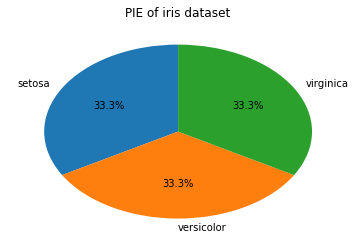

In [17]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

label_counts = df['Species'].value_counts()

plt.title('PIE of iris dataset')
plt.pie(label_counts, labels=iris_dataset.target_names, startangle=90, autopct="%1.1f%%")
plt.show()

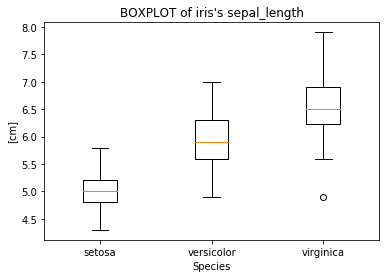

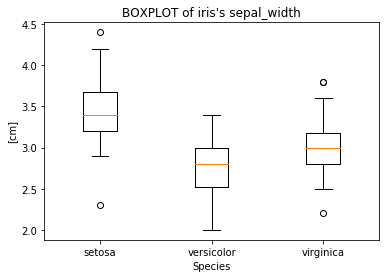

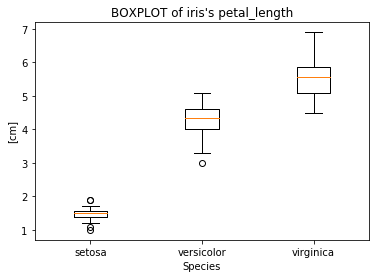

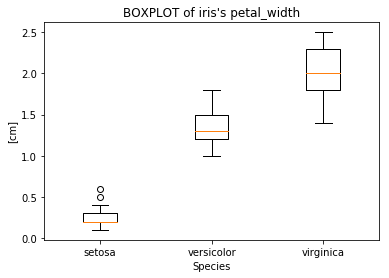

In [18]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for feature in features:
    plt.boxplot([df[df["Species"]==0][feature], df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2, 3], iris_dataset.target_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

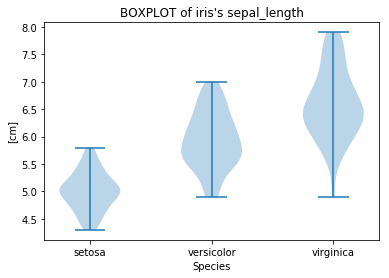

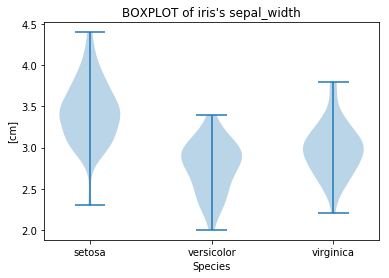

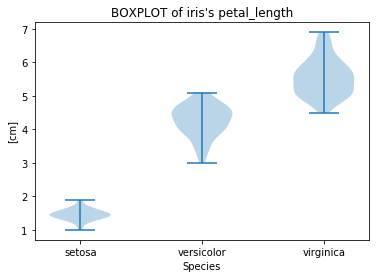

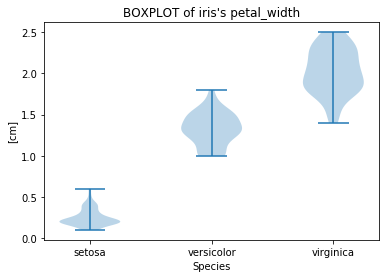

In [19]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for feature in features:
    plt.violinplot([df[df["Species"]==0][feature], df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2, 3], iris_dataset.target_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

「箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。」

boxplotは四分位数を見やすい。violinplotは分布を可視化して見やすい。

### 【問題7】特徴量間の関係の確認

特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameの`corr()`メソッドを使うことで求められます。

[pandas.DataFrame.corr — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

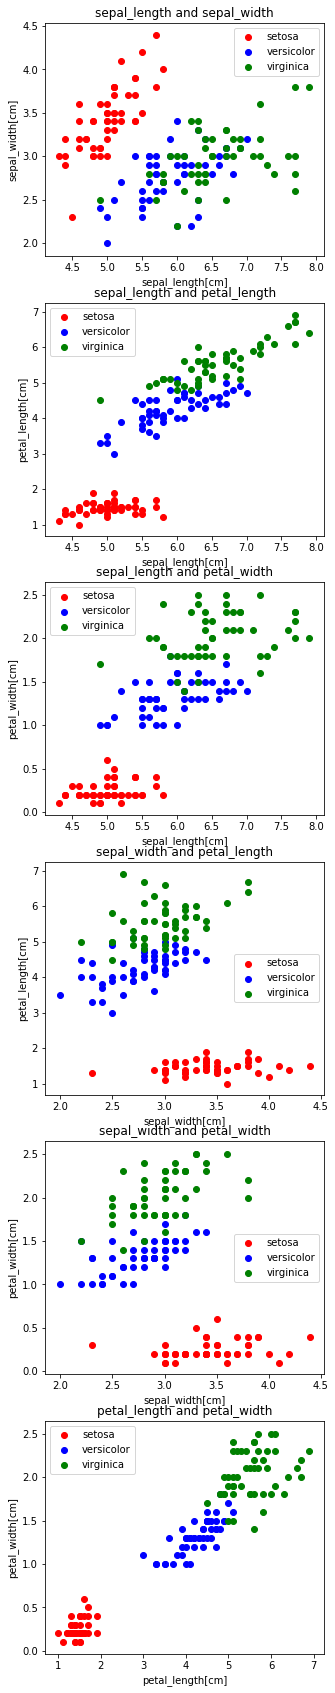

In [20]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

import itertools
combinations = list(itertools.combinations(df.columns[:4], 2)) # 組み合わせの取得
fig, axes = plt.subplots(6, figsize=(5,30)) # subplotsを使うと複数のグラフをまとめられる
for i, comb in enumerate(combinations):
    axes[i].set_title(comb[0]+' and '+comb[1])
    axes[i].set(xlabel=comb[0]+'[cm]', ylabel=comb[1]+'[cm]')
    axes[i].scatter(df[df['Species']==0][comb[0]], df[df['Species']==0][comb[1]], c = 'red', label=load_iris().target_names[0])
    axes[i].scatter(df[df['Species']==1][comb[0]], df[df['Species']==1][comb[1]], c = 'blue', label=load_iris().target_names[1])
    axes[i].scatter(df[df['Species']==2][comb[0]], df[df['Species']==2][comb[1]], c = 'green', label=load_iris().target_names[2])
    axes[i].legend()
plt.show()

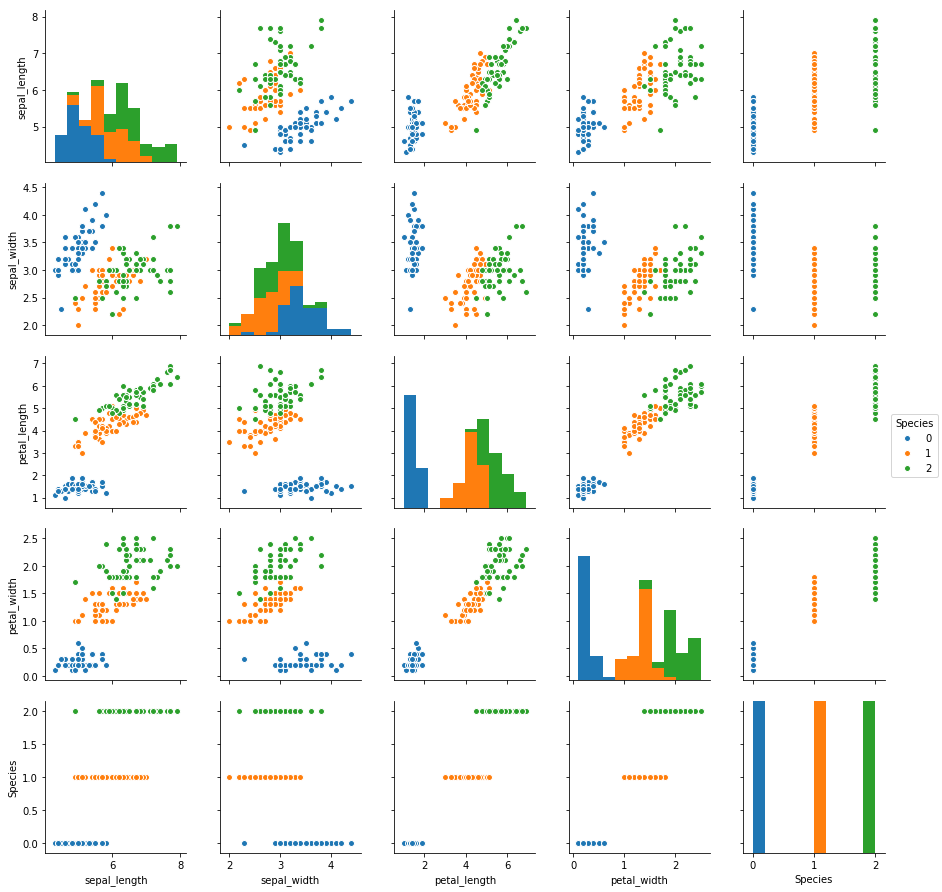

In [21]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

import seaborn as sns

sns.pairplot(df, hue='Species')

In [22]:
# ４つの特徴量に関する相関係数行列を作る

df.iloc[:, 0:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


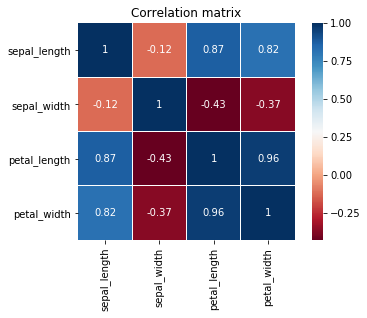

In [23]:
# 相関係数行列のヒートマップを作る

colormap = plt.cm.RdBu
plt.title('Correlation matrix')
sns.heatmap(df.iloc[:, 0:4].corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### 【問題8】簡単な考察

データを探索した時には、考察をすることが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

（解答例）

箱ひげ図やバイオリン図、散布図行列などから種類0はpetal_lengthやpetal_widthが短いという特徴が見えた。これらの特徴量では種類1と2の間でも長さの傾向の違いはあったが、境界は分けにくそうであった。

相関行列を見ると、petal_wdithとpetal_lengthは相関係数が0.96あり、強い正の相関であった。片方だけ見れば良さそうであった。

sepal_lengthやsepal_widthは箱ひげ図やバイオリン図で単独で見ると重なりあっている部分が多かった。しかし、散布図で2つの特徴量を組み合わせれば種類ごとの違いも見えてきた。